# Predicting Housing Prices in Ames

---
embed-resources: true
---

## Introduction

In this report we set out to predict housing prices in Ames, Iowa based on feautres such as  house size,ighbord, etc.  ne numer of bathrooms. Increased accuracy in home price predictions will allow "Pillow" to give buyers looking at listing more reliable estimates and give sellers the ability to set more competitive list prices. This can help users better underswtand their potential mortage costs and increase efficiency in real estate transactions on our platform.

## Methods

In [2]:
# imports

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump


# preprocessing imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

#machine learning imports

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV



### Data

In [3]:
# load data

housing_train = pd.read_parquet(
    "https://cs307.org/lab/data/housing-train.parquet",
)
housing_test = pd.read_parquet(
    "https://cs307.org/lab/data/housing-test.parquet",
)

# create X and y for train dataset
X_train = housing_train.drop("SalePrice", axis=1)
y_train = housing_train["SalePrice"]

# create X and y for test dataset
X_test = housing_test.drop("SalePrice", axis=1)
y_test = housing_test["SalePrice"]

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

from pandas.api.types import CategoricalDtype

# Identify categorical features
categorical_features = X_train.select_dtypes(include='object').columns

# Convert to 'category' dtype
for col in categorical_features:
    X_train[col] = X_train[col].astype(CategoricalDtype())
    X_test[col] = X_test[col].astype(CategoricalDtype())


Each observation in the data contains information about one home transaction in Ames, Iowa between 2006 and 2010. 

The varaibles considered are:

#### Response

**`SalePrice`**  
- `[int64]` Sale price

#### Features

**`Order`**  
- `[int64]` Observation number

**`PID`**  
- `[int64]` Parcel identification number - can be used with city website for parcel review

**`MS SubClass`**  
- `[int64]` Identifies the type of dwelling involved in the sale

**`MS Zoning`**  
- `[object]` General zoning classification of the sale

**`Lot Frontage`**  
- `[float64]` Linear feet of street connected to property

**`Lot Area`**  
- `[int64]` Lot size in square feet

**`Street`**  
- `[object]` Type of road access to property

**`Alley`**  
- `[object]` Type of alley access to property

**`Lot Shape`**  
- `[object]` General shape of property

**`Land Contour`**  
- `[object]` Flatness of the property

**`Utilities`**  
- `[object]` Type of utilities available

**`Lot Config`**  
- `[object]` Lot configuration

**`Land Slope`**  
- `[object]` Slope of property

**`Neighborhood`**  
- `[object]` Physical locations within Ames city limits

**`Condition 1`**  
- `[object]` Proximity to various conditions

**`Condition 2`**  
- `[object]` Proximity to various conditions (if more than one is present)

**`Bldg Type`**  
- `[object]` Type of dwelling

**`House Style`**  
- `[object]` Style of dwelling

**`Overall Qual`**  
- `[int64]` Overall material and finish quality

**`Overall Cond`**  
- `[int64]` Overall condition of the house

**`Year Built`**  
- `[int64]` Original construction date

**`Year Remod/Add`**  
- `[int64]` Remodel date (same as construction if not remodeled)

**`Roof Style`**  
- `[object]` Type of roof

**`Roof Matl`**  
- `[object]` Roof material

**`Exterior 1st`**  
- `[object]` Primary exterior covering on house

**`Exterior 2nd`**  
- `[object]` Secondary exterior covering on house

**`Mas Vnr Type`**  
- `[object]` Masonry veneer type

**`Mas Vnr Area`**  
- `[float64]` Masonry veneer area in square feet

**`Exter Qual`**  
- `[object]` Quality of exterior material

**`Exter Cond`**  
- `[object]` Condition of exterior material

**`Foundation`**  
- `[object]` Type of foundation

**`Bsmt Qual`**  
- `[object]` Height of the basement

**`Bsmt Cond`**  
- `[object]` General condition of the basement

**`Bsmt Exposure`**  
- `[object]` Walkout or garden level walls

**`BsmtFin Type 1`**  
- `[object]` Rating of primary finished basement area

**`BsmtFin SF 1`**  
- `[float64]` Square feet of primary finished basement area

**`BsmtFin Type 2`**  
- `[object]` Rating of secondary finished basement area

**`BsmtFin SF 2`**  
- `[float64]` Square feet of secondary finished basement area

**`Bsmt Unf SF`**  
- `[float64]` Unfinished square feet of basement area

**`Total Bsmt SF`**  
- `[float64]` Total square feet of basement area

**`Heating`**  
- `[object]` Type of heating system

**`Heating QC`**  
- `[object]` Heating quality and condition

**`Central Air`**  
- `[object]` Central air conditioning

**`Electrical`**  
- `[object]` Electrical system

**`1st Flr SF`**  
- `[int64]` First floor square feet

**`2nd Flr SF`**  
- `[int64]` Second floor square feet

**`Low Qual Fin SF`**  
- `[int64]` Low quality finished square feet (all floors)

**`Gr Liv Area`**  
- `[int64]` Above grade (ground level) living area square feet

**`Bsmt Full Bath`**  
- `[float64]` Basement full bathrooms

**`Bsmt Half Bath`**  
- `[float64]` Basement half bathrooms

**`Full Bath`**  
- `[int64]` Full bathrooms above grade

**`Half Bath`**  
- `[int64]` Half bathrooms above grade

**`Bedroom AbvGr`**  
- `[int64]` Bedrooms above grade

**`Kitchen AbvGr`**  
- `[int64]` Kitchens above grade

**`Kitchen Qual`**  
- `[object]` Kitchen quality

**`TotRms AbvGrd`**  
- `[int64]` Total rooms above grade (excluding bathrooms)

**`Functional`**  
- `[object]` Home functionality (assume typical unless deductions apply)

**`Fireplaces`**  
- `[int64]` Number of fireplaces

**`Fireplace Qu`**  
- `[object]` Fireplace quality

**`Garage Type`**  
- `[object]` Garage location

**`Garage Yr Blt`**  
- `[float64]` Year garage was built

**`Garage Finish`**  
- `[object]` Interior finish of the garage

**`Garage Cars`**  
- `[float64]` Garage capacity in number of cars

**`Garage Area`**  
- `[float64]` Garage area in square feet

**`Garage Qual`**  
- `[object]` Garage quality

**`Garage Cond`**  
- `[object]` Garage condition

**`Paved Drive`**  
- `[object]` Paved driveway

**`Wood Deck SF`**  
- `[int64]` Wood deck area in square feet

**`Open Porch SF`**  
- `[int64]` Open porch area in square feet

**`Enclosed Porch`**  
- `[int64]` Enclosed porch area in square feet

**`3Ssn Porch`**  
- `[int64]` Three-season porch area in square feet

**`Screen Porch`**  
- `[int64]` Screen porch area in square feet

**`Pool Area`**  
- `[int64]` Pool area in square feet

**`Pool QC`**  
- `[object]` Pool quality

**`Fence`**  
- `[object]` Fence quality

**`Misc Feature`**  
- `[object]` Miscellaneous feature not covered in other categories

**`Misc Val`**  
- `[int64]` Value of miscellaneous feature

**`Mo Sold`**  
- `[int64]` Month sold

**`Yr Sold`**  
- `[int64]` Year sold

**`Sale Type`**  
- `[object]` Type of sale

**`Sale Condition`**  
- `[object]` Condition of sale

In [4]:
# summary statistics
print(X_train.shape)
X_train.head()


(1875, 81)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
2831,2832,908188140,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
2735,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,...,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca
2134,2135,907200130,20,RL,97.0,11800,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Family
2423,2424,528228415,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1966,1967,535457020,20,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,11,2007,WD,Normal


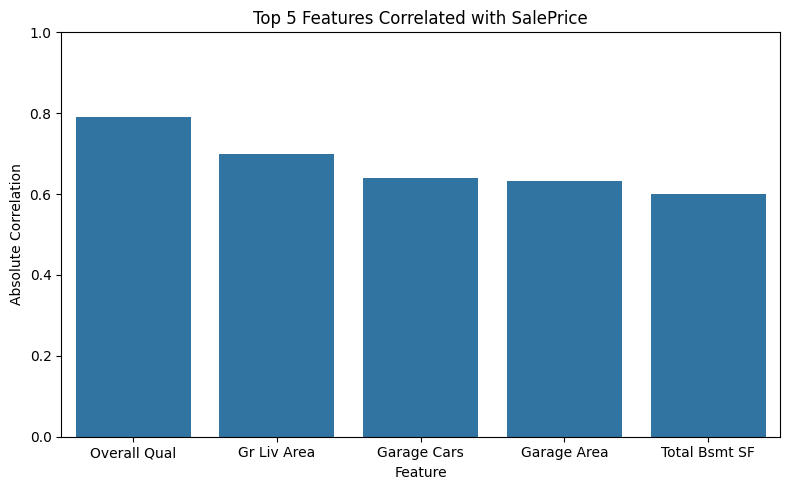

In [11]:
corr_series = housing_train.corr(numeric_only=True)["SalePrice"].drop("SalePrice").abs()

# Get top 5 correlated features
top_5_corr = corr_series.sort_values(ascending=False).head(5)

# Plot as a histogram (really a bar plot since it's categorical x)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_corr.index, y=top_5_corr.values)
plt.title("Top 5 Features Correlated with SalePrice")
plt.ylabel("Absolute Correlation")
plt.xlabel("Feature")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Of all the predictor varaibles, overall quality, ground living area, garage cars feature, garage area, and total basement surface area are the most correlated with the target, sales price of the house.

### Models

In [6]:
# process data for ML

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
)

# define preprocessing for categorical features
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="infrequent_if_exist"),
)

# create general preprocessor
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    remainder="drop",
)

In [7]:
# train models

hb = HistGradientBoostingRegressor()

param_grid = {
    'max_iter': [100, 200],
    'max_depth': [3, 7, 10, None],
    'learning_rate': [0.01, 0.1, 1.0]
}

mod = GridSearchCV(hb, param_grid, scoring = 'neg_mean_absolute_percentage_error', cv = 5, n_jobs = -1)

mod.fit(X_train, y_train)






c:\Users\grant\OneDrive\Desktop\cs307\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\grant\OneDrive\Desktop\cs307\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\grant\AppData\Roaming\uv\python\cpython-3.12.8-windows-x86_64-none\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\grant\AppData\Roaming\uv\python\cpython-3.12.8-windows-x86_64-none\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preex

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 7, 10, None],
                         'max_iter': [100, 200]},
             scoring='neg_mean_absolute_percentage_error')

Histogram Gradient Boosting Regression Trees fit to data.

## Results

In [8]:
# report model metrics
y_pred = mod.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean absolute percentage error: {mape}")

Mean absolute percentage error: 0.08277593830795965


The model achieves a Mean Absolute Percentage Error (MAPE) of approximately 8.28%, meaning its predictions are, on average, within ±8.28% of the true sale prices. This means if  a house sold for $200,000 on average our model would predict a price that is off by $16,560.

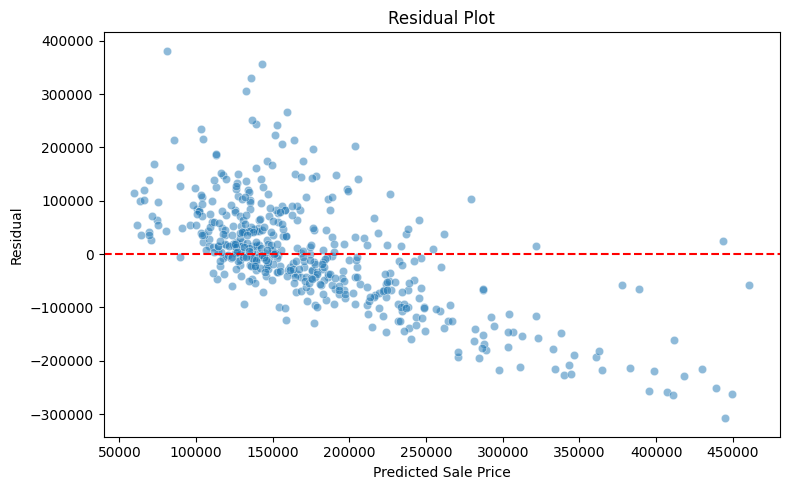

In [15]:
#summary figure


residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

The residual plot shows that our model tends to overestimate cheaper homes and underestimate more expensive ones, suggesting a potential bias or that our model is not fully learning. The spread of errors also increases for higher predicted sale prices, indicating increased uncertainty for expensive properties.

In [10]:
# serialize model

dump(mod, 'housing.joblib')

['housing.joblib']

## Discussion

With a mean absolute percentage error on predicting sales prices of homes of ~ 8.28% I `would not reccomend` our model to be adopted and put into use by Pillow. This error is too wide that buyers and sellers alike could still be off of the competitive price for their house by tens of thousands of dollars, and would be very upset with Pillow if they used our model and it cost them this much money. As well, with the bias that results in larger errors as sales prices of houses go up users would potential be losing even more money depending on the price of their house. 